# 🐭 &nbsp; <font color="#6DA4AA">Electroencephalogram of Sleeping Mice - Data Exploration</font>

In this practical work, we will explore a dataset about mice's sleep obtained from CHUV. This dataset includes the Electroencephalogram (EEG) of a mouse, as well as its state.

In the long run the objective would be to be able to recognize mice sleep stages from their EEG.

![Sleeping mouse](https://www.cottagesmallholder.com/wp-content/images/mouse-asleep-with-tiny-teddy-bear.jpg)

EEG is a scientific tool that helps us study brain activity. It records the electrical signals in the brain over time, creating a time serie with detailed patterns. These patterns include things like alpha oscillations suggesting a relaxed but awake state, beta oscillations that might indicate active thinking and focus, or theta oscillations typically observed during deep sleep and non-REM sleep stages.

As a reminder, the frequency in Hertz is the number of cycles per second:

![Frequency](https://cmtext.indiana.edu/acoustics/img/4cps.png)

The problem is that the information about these patterns is spread out over many data points, making it hard to detect directly the main frequency of such oscillations.

So, we use something called spectral analysis, which transforms these time series into a different view called the frequency domain. This helps us see the main patterns more clearly by concentrating information about one frequency of oscillation. The process of converting data from the time-domain to the frequency-domain is done thanks to Fourier transforms.

See this diagram to better understand the relationship between the time domain and the frequency domain:
![Frequency Domain](https://www.dataphysics.com/wp-content/uploads/2022/01/The_Frequency_Domain_2.jpg)

Let's look a bit closer at our data. A row was generated each 4 seconds (=15 by minute) during one entire day, giving a dataset of 15x60x24=21600 datapoints. After removing outliers, we are left with 20258 datapoints. For each of this datapoint, the mouse is either:

- awake (**w**)
- in REM sleep (**r**)
- in non-REM sleep (**n**).

In addition to its current state, each datapoint (row) is characterized with a "spectrum". As mentioned earlier, it is really difficult to use the raw electrical activity of the mouse brain. This is why we will focus on the spectrum in order to predict the state of the mouse. The spectrum is described as the amplitude of the signal at each frequency between 1 and 101 [Hz] during the last 4 seconds (=since the last datapoint).

The main point to understand is that at each timestamp (= row = datapoint), the mouse is in a specific state and its brain electrical activity is represented by 101 different features based on frequencies.

In [ ]:
import pandas as pd

mice_eeg = pd.read_csv('EEG_mouse_data.csv')
mice_eeg

: 

# 🔎&nbsp; <font color="#6DA4AA">Exploring States Data</font>

Let's see the state transitions of the first hour (we know that 1 hour is 3600 / 4 = 900 datapoints):

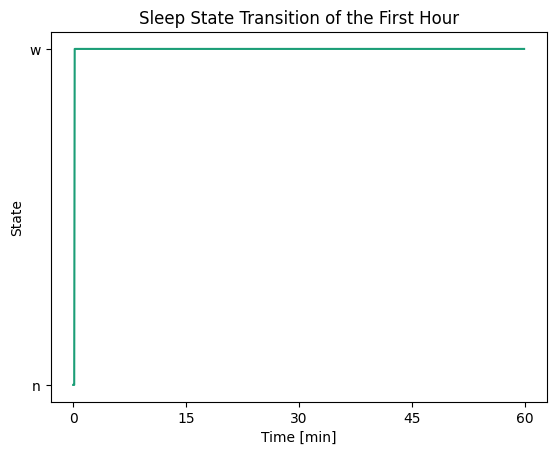

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

plt.title('Sleep State Transition of the First Hour')
plt.plot(mice_eeg.iloc[:900]['state'], color='#1b9e77');
plt.xticks(np.arange(0, 901, 225), np.arange(0, 915 // 15, 225 // 15))
plt.ylabel('State')
plt.xlabel('Time [min]');

As you can see the mouse is awake excepted for the first 3 datapoints where it is in a non-REM stage of sleep.

Now let's see 8 hours of sleep state transitions at a time where we can see the mouse sleeps.

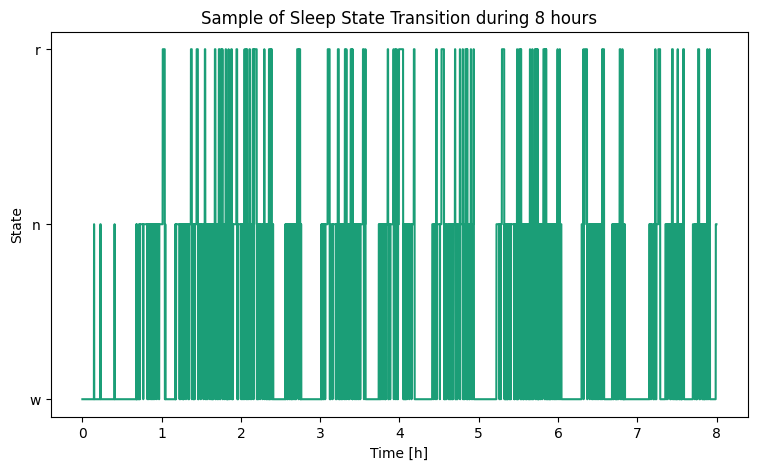

In [ ]:
plt.figure(figsize=(9, 5))
plt.title('Sample of Sleep State Transition during 8 hours')
plt.plot(mice_eeg.iloc[(900*5):(900*5)+(900*8)]['state'], color='#1b9e77')
plt.xticks(np.arange((900*5),(900*5)+(900*8)+1, 900), np.arange(9))
plt.ylabel('State')
plt.xlabel('Time [h]');

# 💡&nbsp; <font color='#F5B82E'>Question</font>

<font color='#F5B82E'>1. What's the big difference between this sleep stage transition and the one below of a human (note: here we have multiple non-REM types).</font>

![](https://www.researchgate.net/publication/305754675/figure/fig1/AS:391434457894913@1470336655208/A-hypnogram-showing-normal-distribution-of-sleep-stages.png)

# 💡&nbsp; <font color='#F5B82E'>Question</font>

<font color='#F5B82E'>2. Look at this bar plot of the states count. Is the dataset balanced?</font>




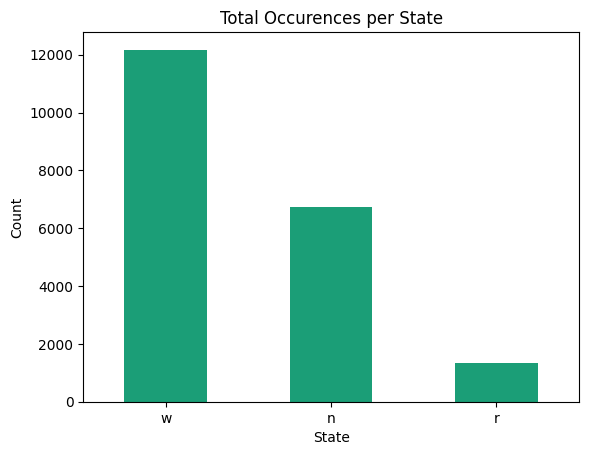

In [ ]:
from collections import Counter

mice_eeg.state.value_counts().plot(kind='bar', cmap='Dark2')
plt.title('Total Occurences per State')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.xlabel('State');

# 💡&nbsp; <font color='#F5B82E'>Question</font>

<font color='#F5B82E'>3.a For each states, create a list of state durations (consecutive seconds the mouse remain in a state) and create subplots with the boxplots of each of the states durations as a subplot. Make sure this plot as a title, labeled axes and generally look good.</font>

<font color='#F5B82E'>3.b What was the longest time the mouse was awake? And what was the median duration in seconds for each states?</font>


# 🔎&nbsp; <font color="#6DA4AA">Exploring Spectrum Data</font>

Here we see the first row frequencies amplitudes. Because rows were generated each 4 seconds, it means that these features have been extracted during the first 4 seconds of the EEG.

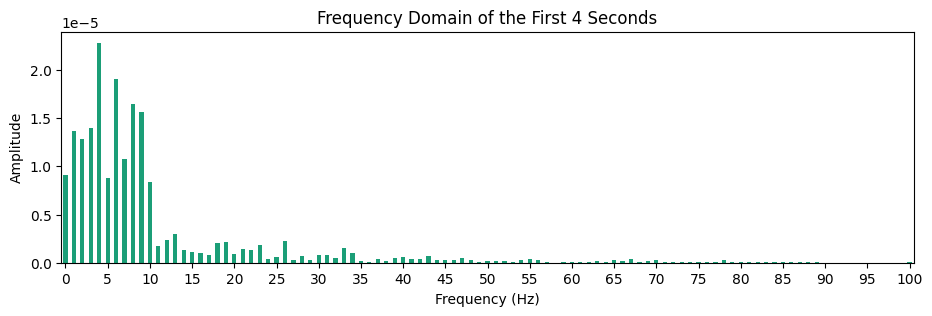

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(11, 3))
plt.title('Frequency Domain of the First 4 Seconds')
mice_eeg.iloc[0][[f'amplitude_around_{n + 1}_Hertz' for n in range(101)]].plot(kind='bar', cmap="Dark2")
plt.xticks(np.arange(0, 102, 5), np.arange(0, 102, 5), rotation=0)
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)');



# 💡&nbsp; <font color='#F5B82E'>Question</font>

<font color='#F5B82E'>4. We can see that the highest amplitude is at 4 hertz. What does that mean about the raw signal that was captured during these 4 seconds?</font>


In the plot below we can see boxplots of the frequencies amplitude for each of the sleep state. Note that we don't show the outliers in this plot.


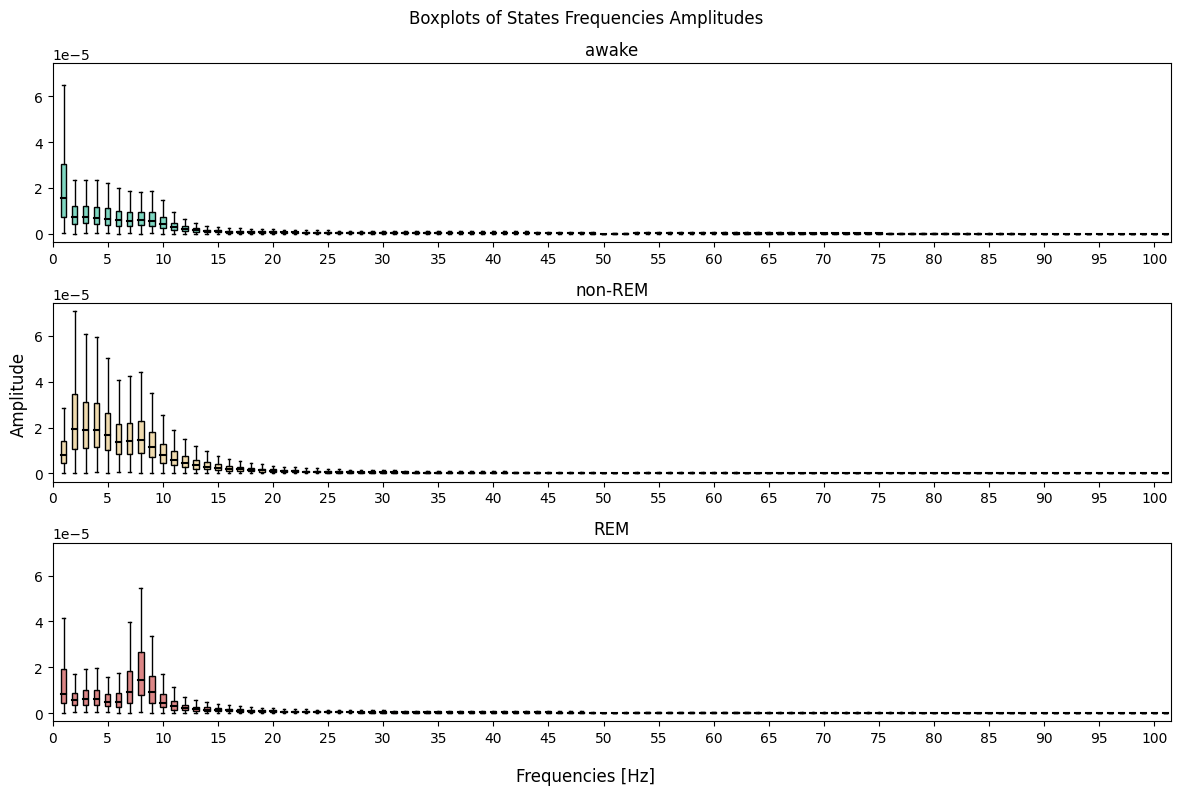

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8), sharey=True)

fig.suptitle("Boxplots of States Frequencies Amplitudes")

boxplot1 = ax1.boxplot(mice_eeg[mice_eeg['state'] == 'w'].drop('state', axis=1), patch_artist=True, medianprops=dict(color="black", linewidth=1.5), showfliers=False)
ax1.set_xticks(np.arange(0, 102, 5), np.arange(0, 102, 5))
ax1.set_title('awake')

boxplot2 = ax2.boxplot(mice_eeg[mice_eeg['state'] == 'n'].drop('state', axis=1), patch_artist=True, medianprops=dict(color="black", linewidth=1.5), showfliers=False)
ax2.set_xticks(np.arange(0, 102, 5), np.arange(0, 102, 5))
ax2.set_title('non-REM')

boxplot3 = ax3.boxplot(mice_eeg[mice_eeg['state'] == 'r'].drop('state', axis=1), patch_artist=True, medianprops=dict(color="black", linewidth=1.5), showfliers=False)
ax3.set_xticks(np.arange(0, 102, 5), np.arange(0, 102, 5));
ax3.set_title('REM')

fig.supylabel('Amplitude')
fig.supxlabel('Frequencies [Hz]')

# fill with colors
colors = ['#7ED7C1', '#F0DBAF', '#DC8686']
for bplot, color in zip([boxplot1, boxplot2, boxplot3], colors):
    for patch in bplot['boxes']:
        patch.set_facecolor(color)

plt.tight_layout()

# 💡&nbsp; <font color='#F5B82E'>Question</font>

<font color='#F5B82E'>5.a At which frequencies does the electrical activity mostly occur?</font>

<font color='#F5B82E'>5.b Create boxplots of the first ten frequencies with states boxplots side by side (each states boxplots of the ten feature, then of the second one and so on).</font>

<font color='#F5B82E'>5.c What can you say about the inter- and intra-class variability?</font>

# ⚙️&nbsp; <font color="#6DA4AA">Defining Rules Manually to Classify Sleep States</font>

# 💡&nbsp; <font color='#F5B82E'>Question</font>

<font color='#F5B82E'>6.a Choose three frequencies you think are good to separates classes, explain why you chose them and plot a 3d scatter plot with them and the state as the colors.</font>

<font color='#F5B82E'>6.b Are the states easily distinguishable from each other? Explain why.</font>

<font color='#F5B82E'>6.c Create some rules with these three features to classify samples state. Look at the scatter plot and boxplots to help you find rules. Provide your accuracy, f1-score and confusion matrix. (you don't need to do any train/validation separation or aim for high performance)</font>

<font color='#F5B82E'>6.d Create a plot of the states transitions you predicted between the rows slice \[$(900*5):(900*6)$\] (hour 5 to 6 of the datapoints we have) and compare it to the real states transitions.</font>